# Recommendation System

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(12,3)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [2]:
book=pd.read_csv("Book_Rec_sys.csv",encoding='ISO-8859-1', index_col=0)
book

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


# EDA

In [3]:
book.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [5]:
book.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [6]:
len(book['User.ID'].unique())

2182

In [7]:
len(book['Book.Title'].unique())

9659

In [8]:
book['Book.Title'].value_counts()


Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

# Data Visualization

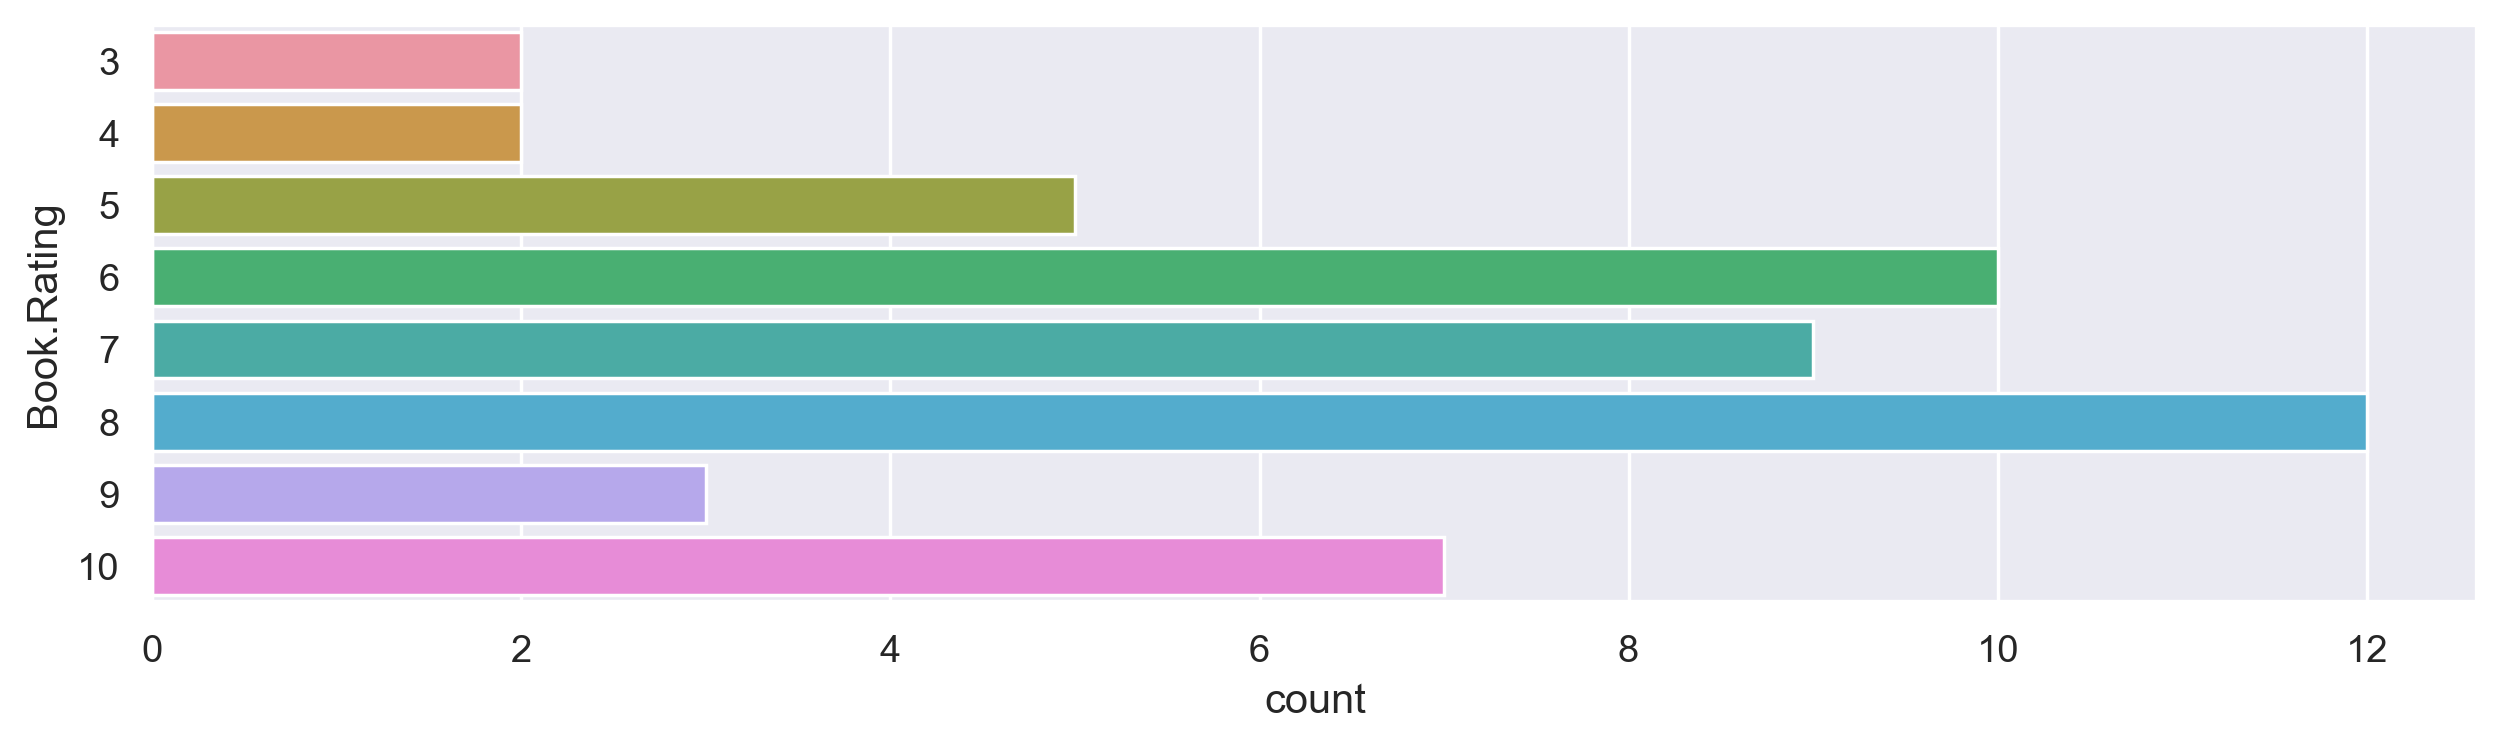

In [36]:
# Count Plot
sns.countplot(y = 'Book.Rating', data= book.head(50));

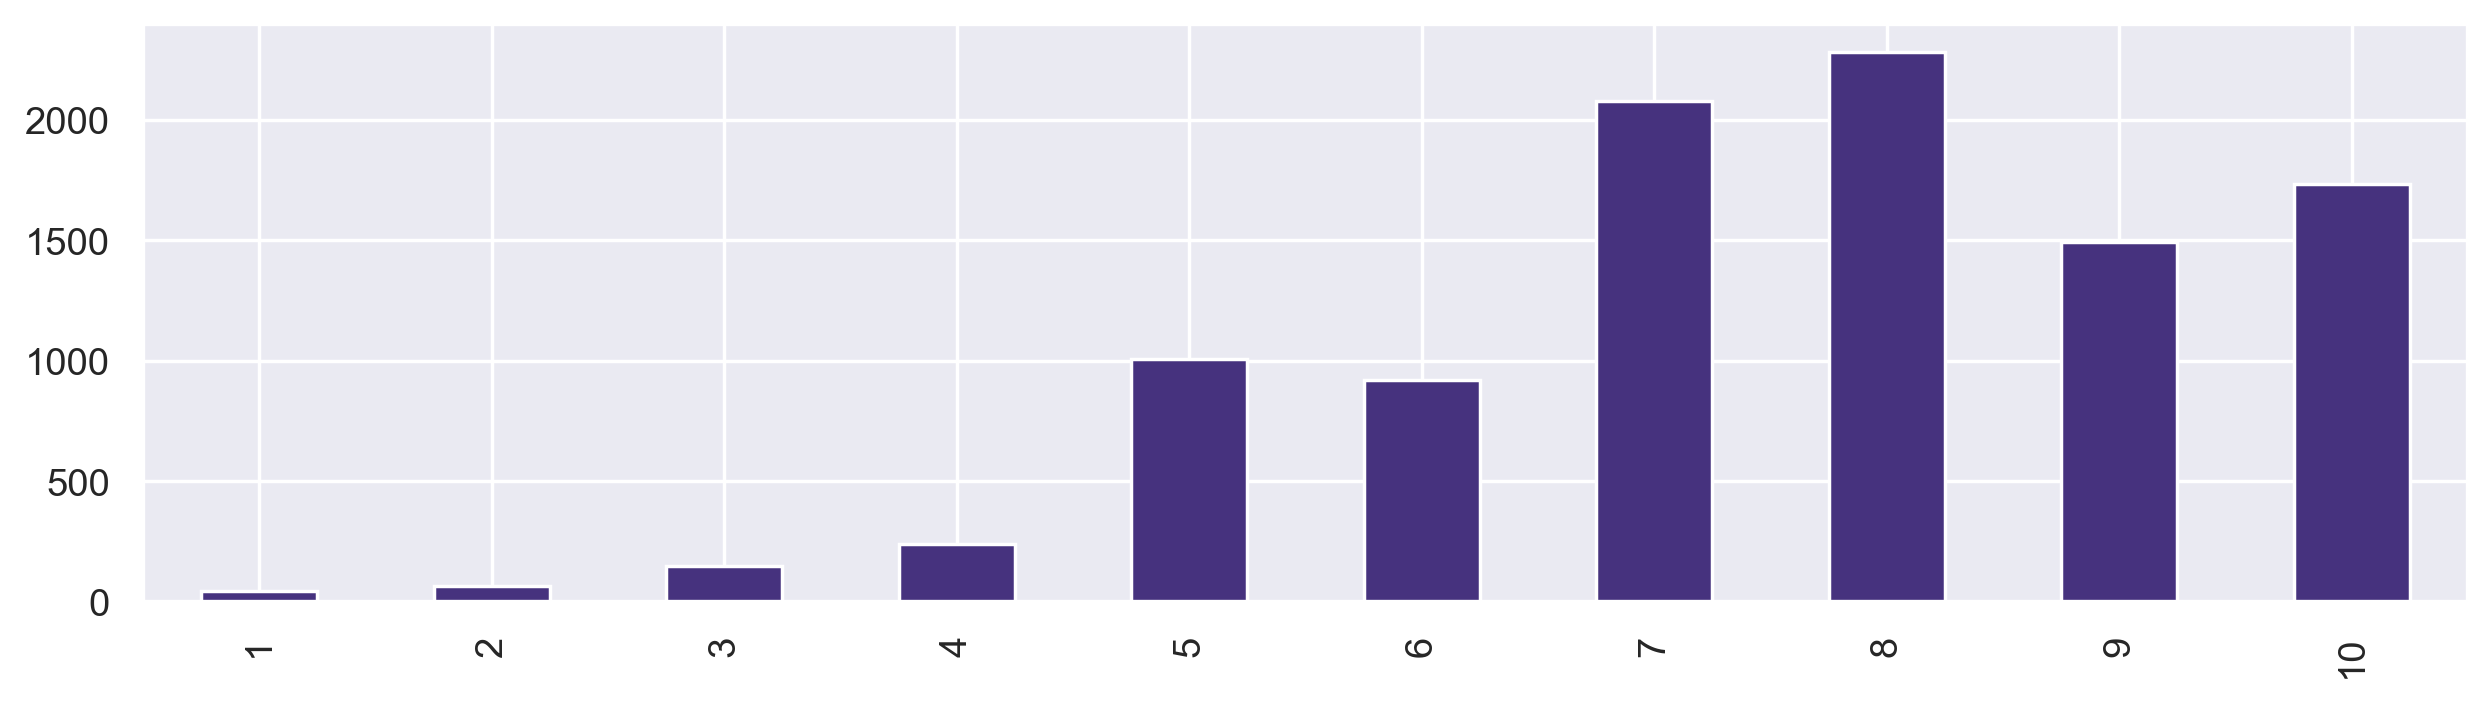

In [37]:
# Bar-plot
book['Book.Rating'].value_counts().sort_index().plot(kind='bar');

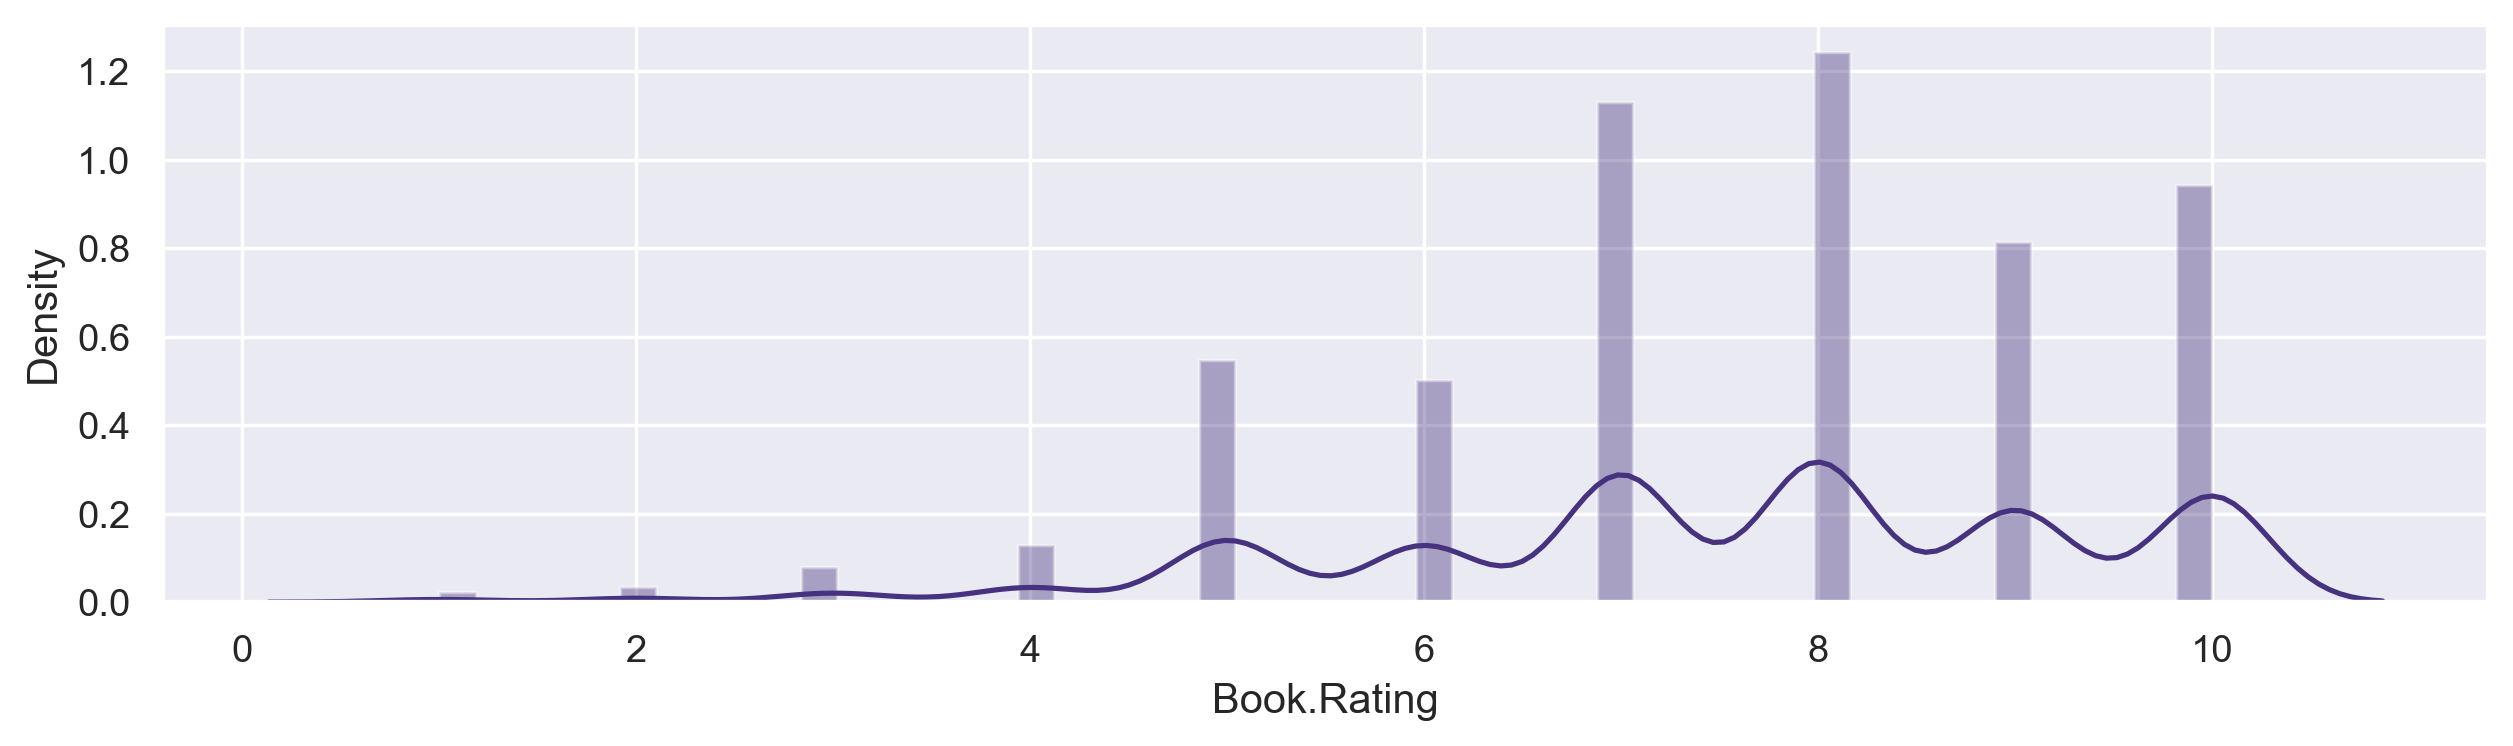

In [38]:
# Dist-plot
sns.distplot(book['Book.Rating']);

# Model Building

In [39]:
pivot = pd.pivot_table(data=book,index=['User.ID'],columns=['Book.Title'],values=['Book.Rating'])
pivot

Book.Rating                                             \
Book.Title  Jason, Madison &amp  Other Stories;Merril;1985;McClelland &amp   
User.ID                                                                      
8                           NaN                                        NaN   
9                           NaN                                        NaN   
10                          NaN                                        NaN   
12                          NaN                                        NaN   
14                          NaN                                        NaN   
...                         ...                                        ...   
278846                      NaN                                        NaN   
278849                      NaN                                        NaN   
278851                      NaN                                        NaN   
278852                      NaN                                        NaN   
278854                      NaN                                        NaN   

                                          \
Book.Title  Repairing PC Drives &amp '48   
User.ID                                    
8                                NaN NaN   
9                                NaN NaN   
10                               NaN NaN   
12                               NaN NaN   
14                               NaN NaN   
...                              ...  ..   
278846                           NaN NaN   
278849                           NaN NaN   
278851                           NaN NaN   
278852                           NaN NaN   
278854                           NaN NaN   

                                                                                  \
Book.Title 'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   
User.ID                                                                            
8                                                         NaN                      
9                                                         NaN                      
10                                                        NaN                      
12                                                        NaN                      
14                                                        NaN                      
...                                                       ...                      
278846                                                    NaN                      
278849                                                    NaN                      
278851                                                    NaN                      
278852                                                    NaN                      
278854                                                    NaN                      

                                                                         \
Book.Title ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR   
User.ID                                                                   
8                                                         NaN             
9                                                         NaN             
10                                                        NaN             
12                                                        NaN             
14                                                        NaN             
...                                                       ...             
278846                                                    NaN             
278849                                                    NaN             
278851                                                    NaN             
278852                                                    NaN             
278854                                                    NaN             

                                                \
Book.Title 01-01-00: A Novel of 

In [40]:
pivot.fillna(0,inplace=True)
pivot

Book.Rating                                             \
Book.Title  Jason, Madison &amp  Other Stories;Merril;1985;McClelland &amp   
User.ID                                                                      
8                           0.0                                        0.0   
9                           0.0                                        0.0   
10                          0.0                                        0.0   
12                          0.0                                        0.0   
14                          0.0                                        0.0   
...                         ...                                        ...   
278846                      0.0                                        0.0   
278849                      0.0                                        0.0   
278851                      0.0                                        0.0   
278852                      0.0                                        0.0   
278854                      0.0                                        0.0   

                                           \
Book.Title  Repairing PC Drives &amp  '48   
User.ID                                     
8                                0.0  0.0   
9                                0.0  0.0   
10                               0.0  0.0   
12                               0.0  0.0   
14                               0.0  0.0   
...                              ...  ...   
278846                           0.0  0.0   
278849                           0.0  0.0   
278851                           0.0  0.0   
278852                           0.0  0.0   
278854                           0.0  0.0   

                                                                                  \
Book.Title 'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   
User.ID                                                                            
8                                                         0.0                      
9                                                         0.0                      
10                                                        0.0                      
12                                                        0.0                      
14                                                        0.0                      
...                                                       ...                      
278846                                                    0.0                      
278849                                                    0.0                      
278851                                                    0.0                      
278852                                                    0.0                      
278854                                                    0.0                      

                                                                         \
Book.Title ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR   
User.ID                                                                   
8                                                         0.0             
9                                                         0.0             
10                                                        0.0             
12                                                        0.0             
14                                                        0.0             
...                                                       ...             
278846                                                    0.0             
278849                                                    0.0             
278851                                                    0.0             
278852                                                    0.0             
278854                                                    0.0             

                                                \
Book.Title 01-01-0

In [41]:
from sklearn.metrics import pairwise_distances


In [42]:
pd.DataFrame(pairwise_distances(pivot,metric='cosine'))


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,2.220446e-16,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2178,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2179,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2180,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [43]:
book.head(3)


,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6


In [44]:
sim = 1 - pairwise_distances(pivot, metric='cosine')
pd.DataFrame(sim)

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
np.fill_diagonal(sim,0)


In [46]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
similarity.index = book['User.ID'].unique()
similarity.columns = book['User.ID'].unique()

In [48]:
pd.set_option('display.max_columns',None)


In [49]:
similarity


276726  276729  276736  276737  276744  276745  276747  276748  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276751  276754  276755  276760  276762  276768  276772  276774  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276780  276786  276788  276796  276798  276800  276804  276808  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276811  276812  276813  276814  276820  276822  276827  276828  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276830  276832  276835  276837  276842  276847  276848  276850  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     

In [50]:
#Find out similar users
similarity.idxmax()

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [51]:
user_1=book[(book['User.ID']==882)]
user_1

,User.ID,Book.Title,Book.Rating
3412,882,The Root Cellar,10
3413,882,AixÃ² Ã©s RÃ dio Pica (ColÂ¨lecciÃ³ Embat),10
3414,882,Jurassic Park,5
3415,882,Dress Your Family in Corduroy and Denim,9
3416,882,"Ransom (Steel, Danielle)",9
3417,882,Cat's Cradle,8
3418,882,"I, Robot",5
3419,882,Drinking Coffee Elsewhere (Today Show Book Clu...,7
3420,882,Chicken Soup for the Teenage Soul II (Chicken ...,10
3421,882,The Husband Test,10


In [52]:
user_2=book[(book['User.ID']==1211)]
user_2

,User.ID,Book.Title,Book.Rating
3772,1211,Wheels Of Fire (Serrated Edge 2),7
3773,1211,Cradle,9
3774,1211,"Masks (Star Trek The Next Generation, No 7)",8
3775,1211,Damia (Rowan),9
3776,1211,BLACK THRONE,8
3777,1211,The Cat in the Hat,8
3778,1211,Another Roadside Attraction,9
3779,1211,Wall of Brass,8
3780,1211,Sisters in Arms,8
3781,1211,More Die of Heartbreak,9


In [53]:
book[(book['User.ID'] == 276729) | (book['User.ID'] == 276726)]


,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6


In [54]:
pd.merge(user_1,user_2,on='Book.Title',how='outer')

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,882.0,The Root Cellar,10.0,NaN,NaN
1,882.0,AixÃ² Ã©s RÃ dio Pica (ColÂ¨lecciÃ³ Embat),10.0,NaN,NaN
2,882.0,Jurassic Park,5.0,NaN,NaN
3,882.0,Dress Your Family in Corduroy and Denim,9.0,NaN,NaN
4,882.0,"Ransom (Steel, Danielle)",9.0,NaN,NaN
...,...,...,...,...,...
90,NaN,The Valley of Horses,NaN,1211.0,9.0
91,NaN,The Clan of the Cave Bear : a novel,NaN,1211.0,10.0
92,NaN,Pets' Letters to God,NaN,1211.0,7.0
93,NaN,Generation Warriors,NaN,1211.0,9.0
